# Part 7:  Performance comparison

In [4]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import matrix_factorization
from surprise import BaselineOnly
from surprise import KNNBasic

from surprise import accuracy
import timeit
import os
import pandas as pd
from surprise.model_selection import KFold
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
#if you ant to save plots, make this variable True
savePlots = False

In [5]:
file_path = os.path.expanduser('/Users/vijayravi/Documents/UCLA/Coursework/2018Winter/dataMining/projects/project3/resources/ratings.csv')
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)

### Question 34

In [10]:
sim_options = {'name': 'pearson'}

trainset, testset = train_test_split(data, test_size=.10)


algoKNN = KNNBasic(k=38, sim_options=sim_options)
algoKNN.fit(trainset)
predictionsKNN = algoKNN.test(testset)


algoNMF = matrix_factorization.NMF(n_factors=18) 
algoNMF.fit(trainset)
predictionsNMF = algoNMF.test(testset)

algoMF = matrix_factorization.SVD(n_factors=12) 
algoMF.fit(trainset)
predictionsMF = algoMF.test(testset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


 Area under the curve for KNN is,  0.7140402558227885
 Area under the curve for NMF is,  0.7693860193823834
 Area under the curve for MF is,  0.7930030722059295


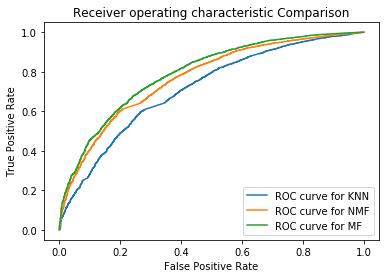

In [11]:
plt.figure()

#KNN
trueValue = []
predValue = []

for i in range(len(testset)):
    if testset[i][2] >= 3: #threshold
        trueValue.append(1)
    else:
        trueValue.append(0)

    predValue.append(predictionsKNN[i][3])

fpr, tpr, thresholds = roc_curve(trueValue,predValue)
roc_auc = auc(fpr, tpr)
print " Area under the curve for KNN is, ", roc_auc
plt.plot(fpr, tpr, label='ROC curve for KNN')

#NMF
trueValue = []
predValue = []

for i in range(len(testset)):
    if testset[i][2] >= 3: #threshold
        trueValue.append(1)
    else:
        trueValue.append(0)

    predValue.append(predictionsNMF[i][3])

fpr, tpr, thresholds = roc_curve(trueValue,predValue)
roc_auc = auc(fpr, tpr)
print " Area under the curve for NMF is, ", roc_auc
plt.plot(fpr, tpr, label='ROC curve for NMF')


#MF
trueValue = []
predValue = []

for i in range(len(testset)):
    if testset[i][2] >= 3: #threshold
        trueValue.append(1)
    else:
        trueValue.append(0)

    predValue.append(predictionsMF[i][3])

fpr, tpr, thresholds = roc_curve(trueValue,predValue)
roc_auc = auc(fpr, tpr)
print " Area under the curve for MF is, ", roc_auc
plt.plot(fpr, tpr, label='ROC curve for MF')




plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Comparison' )
plt.legend(loc="lower right")
plt.show()
if savePlots:
     plt.savefig("roc_comparison_Q34", format='png') 
plt.show()